# Logression Regression of Breast Cancer

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

## Plotting the Features in 2D

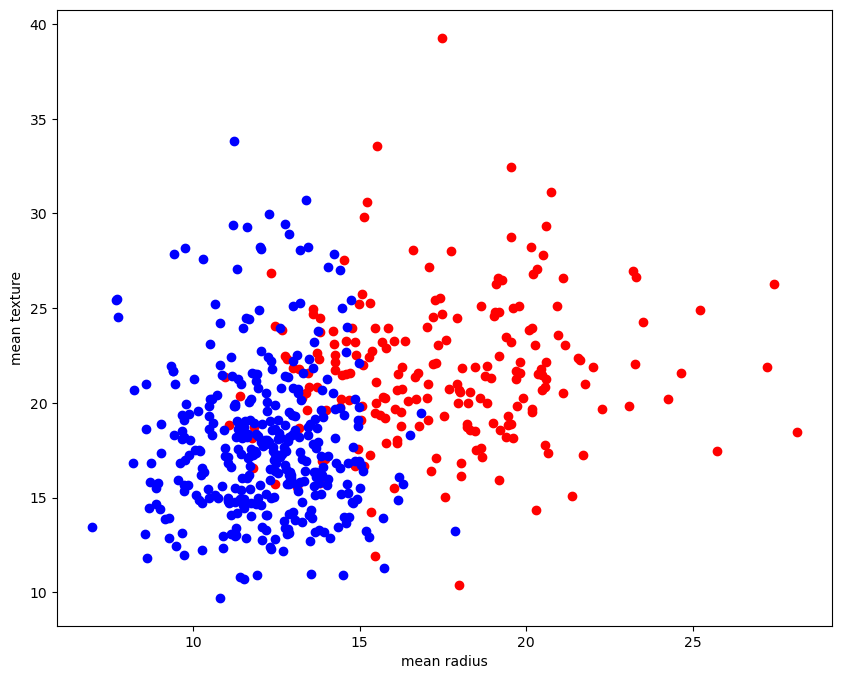

In [9]:
import matplotlib.pyplot as plt

X = []
for target in range(2):
    X.append([[], []])

for i in range(len(cancer.data)):  # target is 0 or 1
    target = cancer.target[i]
    X[target][0].append(cancer.data[i][0])  # first feature - mean radius
    X[target][1].append(cancer.data[i][1])  # second feature — mean texture

colours = ("r", "b")  # r: malignant, b: benign
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

for target in range(2):
    ax.scatter(X[target][0], X[target][1], c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()


## Plotting in 3D

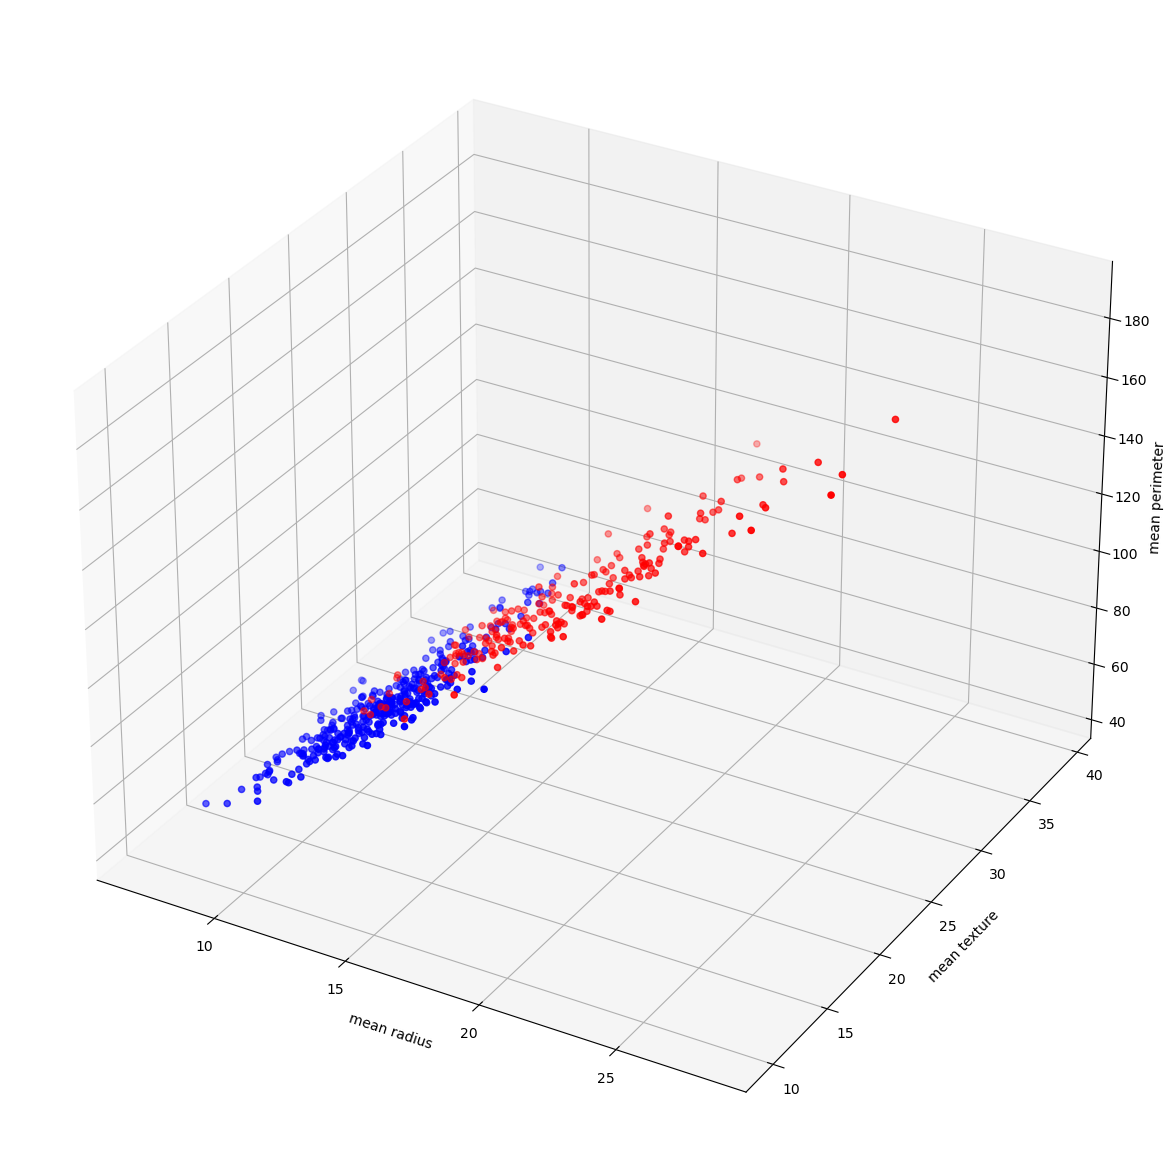

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# Copy from dataset into a 2-d array
X = []
for target in range(2):
    X.append([[], [], []])

for i in range(len(cancer.data)):  # target is 0,1
    target = cancer.target[i]
    if cancer.target[i] == target:
        X[target][0].append(cancer.data[i][0])
        X[target][1].append(cancer.data[i][1])
        X[target][2].append(cancer.data[i][2])

colours = ("r", "b")  # r: malignant, b: benign
fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(111, projection='3d')

for target in range(2):
    ax.scatter(X[target][0], X[target][1], X[target][2], c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

## Training Using One Feature

C:\Users\HP\AppData\Local\Temp\ipykernel_2892\3920042598.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y,


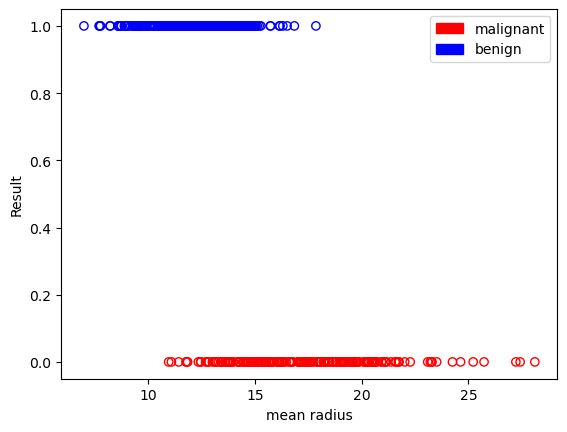

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()  # Load dataset
x = cancer.data[:, 0]  # mean radius
y = cancer.target  # 0: malignant, 1: benign
colors = {0: 'red', 1: 'blue'}  # 0: malignant, 1: benign

plt.scatter(x, y,
            facecolors='none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)

plt.xlabel("mean radius")
plt.ylabel("Result")

red = mpatches.Patch(color='red', label='malignant')
blue = mpatches.Patch(color='blue', label='benign')
plt.legend(handles=[red, blue], loc=1)
plt.show()

## Finding the Intercept and Coefficient

In [12]:
from sklearn import linear_model
import numpy as np

# Creating a Logistic Regression model
log_regress = linear_model.LogisticRegression()

# Training the model
log_regress.fit(X=np.array(x).reshape(len(x), 1), y=y)

# Print trained model intercept
print("Intercept:", log_regress.intercept_)  # [8.19393897]

# Print trained model coefficients
print("Coefficient:", log_regress.coef_)  # [[-0.54291739]]

Intercept: [15.120902]
Coefficient: [[-1.02475609]]


## Plotting the Sigmoid Curve

C:\Users\HP\AppData\Local\Temp\ipykernel_2892\3633914117.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y,


Text(0, 0.5, 'Probability')

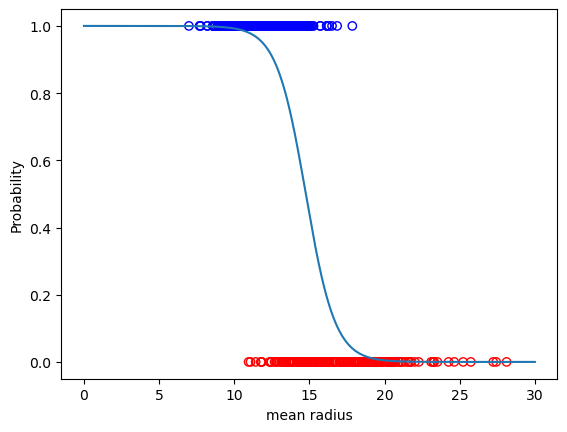

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-(log_regress.intercept_[0] + log_regress.coef_[0][0] * x)))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x, y,
            facecolors='none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),
            cmap=colors)
plt.plot(x1, y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

## Making Predictions

In [15]:
# Assuming '20' is a single feature value, you need to pass it as an array
print(log_regress.predict_proba([[20]]))  # [[0.93489354 0.06510646]]
print(log_regress.predict([[20]])[0])  # 0

[[0.99538685 0.00461315]]
0


In [16]:
print(log_regress.predict_proba([[8]]))  # [[0.02082411 0.97917589]]
print(log_regress.predict([[8]])[0])    # [1]

[[9.84046071e-04 9.99015954e-01]]
1


## Training the Model Using All Features

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() # Load dataset

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(
    cancer.data,  # features
    cancer.target,  # labels
    test_size=0.25,  # split ratio
    random_state=1,  # set random seed
    stratify=cancer.target  # stratify the split based on labels
)

In [19]:
from sklearn import linear_model

x = train_set[:, 0:30]  # mean radius
y = train_labels  # 0: malignant, 1: benign

log_regress = linear_model.LogisticRegression()
log_regress.fit(X=x, y=y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
print(log_regress.intercept_) #
print(log_regress.coef_) 

[0.10459203]
[[ 0.59430601  0.52544073  0.51581624 -0.0317842  -0.01643815 -0.09248961
  -0.13108971 -0.05193203 -0.0301988  -0.00439447  0.02767124  0.14185002
   0.02860642 -0.10858941 -0.00145442 -0.02182297 -0.02989589 -0.0069565
  -0.00567041 -0.0020869   0.68814526 -0.5750083  -0.31490621 -0.00620847
  -0.03321969 -0.31278933 -0.39378786 -0.10618255 -0.08980769 -0.02924368]]


## Testing Model

In [21]:
import pandas as pd

# Get the predicted probabilities and convert into a dataframe
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

# Assign column names to prediction
preds_prob.columns = ["Malignant", "Benign"]

# Get the predicted class labels
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

# Actual diagnosis
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

# Merge the three dataframes into one
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

   Malignant        Benign  Prediction  Original Result
0   0.999823  1.767286e-04           0                0
1   0.999690  3.101773e-04           0                0
2   0.165667  8.343328e-01           1                1
3   1.000000  6.834008e-09           0                0
4   0.090339  9.096605e-01           1                0


## Confusion Model

In [22]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   4
1       5  86


In [23]:
from sklearn import metrics
#---view the confusion matrix---
print(metrics.confusion_matrix(y_true = test_labels, # True labels
y_pred = preds)) # Predicted labels

[[48  5]
 [ 4 86]]


In [24]:
#---get the accuracy of the prediction---
print("---Accuracy---")
print(log_regress.score(X = test_set ,
y = test_labels))

---Accuracy---
0.9370629370629371


In [26]:
#View summary of common classification metrics
print("---Metrices---")
print(metrics.classification_report(y_true = test_labels, y_pred = preds))

---Metrices---
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

